IMPORTING LIBRARIES

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [20]:
dataset = pd.read_csv('Housing.csv')
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

print('INDEPEDENT VARIABLES:\n ', x)
print('\n\nDEPENDENT VARIABLES:\n ', y)

INDEPEDENT VARIABLES:
  [[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]


DEPENDENT VARIABLES:
  [13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  66

ENCODING THE INDEPDENT VARIABLES

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  OneHotEncoder


x = dataset.iloc[:, 1:].values

le = LabelEncoder()

x[:, 4] = le.fit_transform(x[:, 4])
x[:, 5] = le.fit_transform(x[:, 5])
x[:, 6] = le.fit_transform(x[:, 6])
x[:, 7] = le.fit_transform(x[:, 7])
x[:, 8] = le.fit_transform(x[:, 8])
x[:, 10] = le.fit_transform(x[:, 10])

print('independent variables after Label Encoding:\n ', x)

independent variables after Label Encoding:
  [[7420 4 2 ... 2 1 'furnished']
 [8960 4 4 ... 3 0 'furnished']
 [9960 3 2 ... 2 1 'semi-furnished']
 ...
 [3620 2 1 ... 0 0 'unfurnished']
 [2910 3 1 ... 0 0 'furnished']
 [3850 3 1 ... 0 0 'unfurnished']]


ENCODING THE "FURNISHING STATUS" COLUMN

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_features_onehot = [11]

ct = ColumnTransformer(
    transformers=[('one_hot_encoder', OneHotEncoder(), categorical_features_onehot)],
    remainder='passthrough'
)

x = ct.fit_transform(x)

x = np.array(x, dtype=float)

print('independent variables after one-hot Encoding:\n ', x)

independent variables after one-hot Encoding:
  [[1. 0. 0. ... 1. 2. 1.]
 [1. 0. 0. ... 1. 3. 0.]
 [0. 1. 0. ... 0. 2. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


SPLIT THE DATASET INTO TRAINING SET AND TEST SET

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

APPLY FEATURE SCALING

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


y_train = y_train.reshape(-1, 1)
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train).ravel()


TRAINING THE POLYNOMIAL REGRESSION MODEL

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)


lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)
y_pred_poly = lin_reg.predict(x_test_poly)
print(y_pred_poly)


[[ 5.13605083e+06]
 [-1.09107388e+07]
 [ 4.12477271e+06]
 [-4.12041855e+07]
 [ 2.38425289e+06]
 [ 4.78960910e+06]
 [ 1.23147249e+07]
 [ 3.33263380e+06]
 [ 8.81579918e+06]
 [ 4.71445967e+07]
 [ 4.82902345e+06]
 [ 1.40184247e+06]
 [ 3.44788881e+06]
 [ 6.02363382e+06]
 [ 8.43593527e+06]
 [ 3.43899824e+06]
 [ 8.70809807e+06]
 [ 7.72094979e+06]
 [ 3.00219488e+06]
 [ 9.53382359e+06]
 [ 1.92899661e+07]
 [-1.38312038e+07]
 [ 3.46364752e+06]
 [-4.78240904e+05]
 [ 9.52380603e+06]
 [ 2.28612687e+07]
 [ 1.26202671e+07]
 [ 7.92705116e+06]
 [-1.73830944e+07]
 [ 2.07234611e+06]
 [ 7.12726326e+06]
 [ 1.32431040e+07]
 [ 1.72069327e+07]
 [ 2.87847927e+05]
 [ 2.35776127e+07]
 [-2.12581815e+07]
 [ 3.40082484e+06]
 [ 2.58433586e+06]
 [ 2.43213649e+06]
 [-8.52862888e+06]
 [ 1.93007995e+07]
 [-1.54257137e+07]
 [ 7.23768692e+06]
 [ 7.36116408e+05]
 [ 2.54272408e+06]
 [ 1.15003923e+07]
 [ 1.84845879e+06]
 [ 2.95336230e+06]
 [ 5.68161954e+06]
 [ 1.27350393e+06]
 [ 4.40026099e+06]
 [ 5.63466333e+07]
 [-1.0374533

TRAINING THE SUPPORT VECTOR REGRSSION MODEL

In [26]:
from sklearn.svm import SVR


svr = SVR(kernel='rbf')
svr.fit(x_train, y_train_scaled)
y_pred_svr_scaled = svr.predict(x_test)
y_pred_svr = sc_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

TRAINING THE RANDOM FOREST REGRESSION

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train.ravel())
y_pred_rf = rf.predict(x_test)

MODELS PREDICTING FUNCTION

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, y_pred_poly, "polynomial regression")
evaluate_model(y_test, y_pred_svr, "SVR")
evaluate_model(y_test, y_pred_rf, "random forest regression")


--- polynomial regression ---
R² Score: -223.47857074095822
MAE: 10793792.733502798
RMSE: 25433031.28570195

--- SVR ---
R² Score: 0.5888234199508515
MAE: 711004.1323957484
RMSE: 1088491.0594558618

--- random forest regression ---
R² Score: 0.5639405827126871
MAE: 815750.5247706424
RMSE: 1120942.9664973135


VISUAL COMPARSION

In [29]:
models = ['polynomial', 'SVR', 'random Forest']
r2_scores = [
    r2_score(y_test, y_pred_poly),
    r2_score(y_test, y_pred_svr),
    r2_score(y_test, y_pred_rf)
]

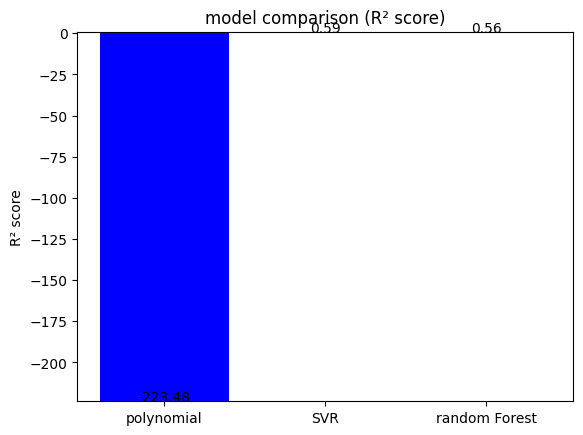

In [30]:
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title("model comparison (R² score)")
plt.ylabel("R² score")

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.ylim(min(r2_scores)-0.1, 1)
plt.show()
